# Experiment 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx

In [2]:
import logging

from src.simulation import Simulation
from src.network import Network
from src.render import Render

logging.disable(logging.CRITICAL)

In [3]:
# Relative Path to Network INP File
network_file = 'networks/Net3.inp'
# Create the environment
env = Network(network_file)
# Get all the nodes in the network with degree = 1 - these will be the possible start nodes
g = env.water_network_model.to_graph().to_undirected()
deg = g.degree
start_pool = [node for node, degree in deg if degree == 1]
print(f"Start pool: {start_pool}")
print(f"Number of start nodes: {len(start_pool)}")
print(f"Number of nodes: {len(g.nodes)}")

Start pool: ['15', '35', '131', '166', '167', '203', '219', '225', '231', '243', '253', 'River', 'Lake', '1', '2', '3']
Number of start nodes: 16
Number of nodes: 97


## Create simulations
### Simulation parameters:
- env: the network environment - Net3
- num_agents: the number of agents to create - 10
- swarm: whether to use swarm intelligence - all of options will be tested
- swarm_config: the swarm configuration - all of options will be tested
- start_node: the start node for the simulation - 15 nodes from the start node pool
- max_turns: the maximum number of turns to run the simulation - 100

In [4]:
start_nodes = start_pool[:15]
num_agents = 10
max_turns = 100

print(f"Start nodes: {start_nodes}")

Start nodes: ['15', '35', '131', '166', '167', '203', '219', '225', '231', '243', '253', 'River', 'Lake', '1', '2']


### Experiment 2.1
- env: Net3
- num_agents: 10
- swarm: False
- swarm_config: None
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment1/NoSwarm

In [5]:
simulations_2_1 = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=False, start_positions=[start_node], filepath="notable-results/Experiment-1/NoSwarm")
    simulations_2_1.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_2_1}")

Starting simulation with start node: 15
Starting simulation with start node: 35
Starting simulation with start node: 131
Starting simulation with start node: 166
Starting simulation with start node: 167
Starting simulation with start node: 203
Starting simulation with start node: 219
Starting simulation with start node: 225
Starting simulation with start node: 231
Starting simulation with start node: 243
Starting simulation with start node: 253
Starting simulation with start node: River
Starting simulation with start node: Lake
Starting simulation with start node: 1
Starting simulation with start node: 2
Done: [('15', 'notable-results/Experiment-1/NoSwarm/simulation_20230322_093455'), ('35', 'notable-results/Experiment-1/NoSwarm/simulation_20230322_093457'), ('131', 'notable-results/Experiment-1/NoSwarm/simulation_20230322_093457'), ('166', 'notable-results/Experiment-1/NoSwarm/simulation_20230322_093458'), ('167', 'notable-results/Experiment-1/NoSwarm/simulation_20230322_093458'), ('2

In [6]:
# Load the results from each simulation into a dataframe
df_2_1 = pd.DataFrame()

for start_node, path in simulations_2_1:
    df_temp = pd.read_csv(f"{path}/results.csv")
    
    # Drop the pct_explored column
    try:
        df_temp = df_temp.drop(columns=['pct_explored'])
    except KeyError as e:
        print(e)
        pass
    
    # Transpose the dataframe and make the turn number the column name
    df_temp = df_temp.T
    df_temp.columns = df_temp.iloc[0].astype(int)
    df_temp = df_temp.drop(df_temp.index[0])
    
    # If this is the first iteration, create the columns of the simulations dataframe as the turn number
    if df_2_1.empty:
        df_2_1 = df_temp
        # Add a column for the start node
        df_2_1['start_node'] = start_node
    else:
        # Add a column for the start node
        df_temp['start_node'] = start_node
        df_2_1 = pd.concat([df_2_1, df_temp], axis=0)
        
# Create a row with the average pct_explored for each turn
df_2_1.loc['avg'] = df_2_1.mean(numeric_only=True, axis=0)
df_2_1.loc['max'] = df_2_1.max(numeric_only=True, axis=0)
df_2_1.loc['min'] = df_2_1.min(numeric_only=True, axis=0)

In [7]:
df_2_1

turn,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,start_node
novelty_score,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,15
novelty_score,1.0,1.0,1.000000,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35
novelty_score,1.0,1.0,1.000000,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,131
novelty_score,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166
novelty_score,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167
novelty_score,1.0,1.0,0.000000,1.000000,1.000000,1.000000,1.0,0.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203
novelty_score,1.0,1.0,0.000000,1.000000,1.000000,1.000000,1.0,0.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,219
novelty_score,1.0,1.0,1.000000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,225
novelty_score,1.0,1.0,1.000000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,231
novelty_score,1.0,1.0,1.000000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243


### Experiment 2.2
- env: Net3
- num_agents: 10
- swarm: True
- swarm_config: naive
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment1/NaiveSwarm

In [8]:
swarm_config = {'swarm': True, 'swarm_type': 'naive'}

simulations_2_2 = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-1/NaiveSwarm")
    simulations_2_2.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_2_2}")

Starting simulation with start node: 15
Starting simulation with start node: 35
Starting simulation with start node: 131
Starting simulation with start node: 166
Starting simulation with start node: 167
Starting simulation with start node: 203
Starting simulation with start node: 219
Starting simulation with start node: 225
Starting simulation with start node: 231
Starting simulation with start node: 243
Starting simulation with start node: 253
Starting simulation with start node: River
Starting simulation with start node: Lake
Starting simulation with start node: 1
Starting simulation with start node: 2
Done: [('15', 'notable-results/Experiment-1/NaiveSwarm/simulation_20230322_093504'), ('35', 'notable-results/Experiment-1/NaiveSwarm/simulation_20230322_093504'), ('131', 'notable-results/Experiment-1/NaiveSwarm/simulation_20230322_093505'), ('166', 'notable-results/Experiment-1/NaiveSwarm/simulation_20230322_093505'), ('167', 'notable-results/Experiment-1/NaiveSwarm/simulation_2023032

In [9]:
# Load the results from each simulation into a dataframe
df_2_2 = pd.DataFrame()

for start_node, path in simulations_2_2:
    df_temp = pd.read_csv(f"{path}/results.csv")
    
    # Drop the pct_explored column
    try:
        df_temp = df_temp.drop(columns=['pct_explored'])
    except KeyError as e:
        print(e)
        pass
    
    # Transpose the dataframe and make the turn number the column name
    df_temp = df_temp.T
    df_temp.columns = df_temp.iloc[0].astype(int)
    df_temp = df_temp.drop(df_temp.index[0])
    
    # If this is the first iteration, create the columns of the main dataframe as the turn number
    if df_2_2.empty:
        df_2_2 = df_temp
        # Add a column for the start node
        df_2_2['start_node'] = start_node
    else:
        # Add a column for the start node
        df_temp['start_node'] = start_node
        df_2_2 = pd.concat([df_2_2, df_temp], axis=0)
        
# Create a row with the average pct_explored for each turn
df_2_2.loc['avg'] = df_2_2.mean(numeric_only=True, axis=0)
df_2_2.loc['max'] = df_2_2.max(numeric_only=True, axis=0)
df_2_2.loc['min'] = df_2_2.min(numeric_only=True, axis=0)

In [19]:
df_2_2

turn,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,start_node
novelty_score,1.0,1.0,0.750000,0.400000,0.500000,0.285714,0.250000,0.111111,0.100000,0.111111,...,0.0,0.0,0.0,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000,15
novelty_score,1.0,1.0,0.750000,0.400000,0.500000,0.285714,0.250000,0.111111,0.100000,0.111111,...,0.0,0.0,0.0,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000,35
novelty_score,1.0,1.0,0.666667,0.500000,0.400000,0.333333,0.285714,0.250000,0.222222,0.222222,...,0.0,0.0,0.0,0.100000,0.100000,0.100000,0.100000,0.111111,0.100000,131
novelty_score,1.0,1.0,0.666667,0.500000,0.400000,0.333333,0.285714,0.250000,0.222222,0.222222,...,0.0,0.0,0.0,0.100000,0.100000,0.100000,0.100000,0.111111,0.100000,166
novelty_score,1.0,1.0,0.500000,0.250000,0.333333,0.200000,0.000000,0.000000,0.250000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,167
novelty_score,1.0,1.0,0.500000,0.250000,0.333333,0.200000,0.000000,0.000000,0.250000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,203
novelty_score,1.0,1.0,0.500000,0.250000,0.333333,0.200000,0.000000,0.000000,0.250000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,219
novelty_score,1.0,1.0,0.750000,0.500000,0.500000,0.142857,0.250000,0.250000,0.250000,0.250000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,225
novelty_score,1.0,1.0,0.750000,0.500000,0.500000,0.142857,0.250000,0.250000,0.250000,0.250000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,231
novelty_score,1.0,1.0,0.750000,0.200000,0.200000,0.333333,0.166667,0.142857,0.166667,0.166667,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,243


### Experiment 2.3
- env: Net3
- num_agents: 10
- swarm: True
- swarm_config: informed, mean
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment1/InformedMeanSwarm

In [11]:
swarm_config = {'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'mean'}

simulations_2_3 = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-1/InformedMeanSwarm")
    simulations_2_3.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_2_3}")

Starting simulation with start node: 15
Starting simulation with start node: 35
Starting simulation with start node: 131
Starting simulation with start node: 166
Starting simulation with start node: 167
Starting simulation with start node: 203
Starting simulation with start node: 219
Starting simulation with start node: 225
Starting simulation with start node: 231
Starting simulation with start node: 243
Starting simulation with start node: 253
Starting simulation with start node: River
Starting simulation with start node: Lake
Starting simulation with start node: 1
Starting simulation with start node: 2
Done: [('15', 'notable-results/Experiment-1/InformedMeanSwarm/simulation_20230322_093511'), ('35', 'notable-results/Experiment-1/InformedMeanSwarm/simulation_20230322_093512'), ('131', 'notable-results/Experiment-1/InformedMeanSwarm/simulation_20230322_093512'), ('166', 'notable-results/Experiment-1/InformedMeanSwarm/simulation_20230322_093513'), ('167', 'notable-results/Experiment-1/I

In [12]:
# Load the results from each simulation into a dataframe
df_2_3 = pd.DataFrame()

for start_node, path in simulations_2_3:
    df_temp = pd.read_csv(f"{path}/results.csv")
    
    # Drop the pct_explored column
    try:
        df_temp = df_temp.drop(columns=['pct_explored'])
    except KeyError as e:
        print(e)
        pass
    
    # Transpose the dataframe and make the turn number the column name
    df_temp = df_temp.T
    df_temp.columns = df_temp.iloc[0].astype(int)
    df_temp = df_temp.drop(df_temp.index[0])
    
    # If this is the first iteration, create the columns of the main dataframe as the turn number
    if df_2_3.empty:
        df_2_3 = df_temp
        # Add a column for the start node
        df_2_3['start_node'] = start_node
    else:
        # Add a column for the start node
        df_temp['start_node'] = start_node
        df_2_3 = pd.concat([df_2_3, df_temp], axis=0)
        
# Create a row with the average pct_explored for each turn
df_2_3.loc['avg'] = df_2_3.mean(numeric_only=True, axis=0)
df_2_3.loc['max'] = df_2_3.max(numeric_only=True, axis=0)
df_2_3.loc['min'] = df_2_3.min(numeric_only=True, axis=0)

In [20]:
df_2_3

turn,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,start_node
novelty_score,1.0,1.0,0.666667,0.500000,0.500,0.500000,0.375000,0.142857,0.000000,0.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.111111,0.100000,15
novelty_score,1.0,1.0,0.750000,0.666667,0.625,0.222222,0.400000,0.500000,0.200000,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35
novelty_score,1.0,1.0,0.750000,0.666667,0.625,0.222222,0.400000,0.500000,0.200000,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,131
novelty_score,1.0,1.0,0.800000,0.500000,0.500,0.500000,0.222222,0.111111,0.200000,0.444444,...,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,166
novelty_score,1.0,1.0,0.800000,0.500000,0.500,0.500000,0.222222,0.111111,0.200000,0.444444,...,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,167
novelty_score,1.0,1.0,0.500000,0.400000,0.600,0.166667,0.166667,0.285714,0.285714,0.222222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.100000,0.000000,203
novelty_score,1.0,1.0,0.500000,0.400000,0.600,0.166667,0.166667,0.285714,0.285714,0.222222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.100000,0.000000,219
novelty_score,1.0,1.0,0.500000,0.400000,0.600,0.166667,0.166667,0.285714,0.285714,0.222222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.100000,0.000000,225
novelty_score,1.0,1.0,0.666667,0.600000,0.500,0.375000,0.285714,0.375000,0.250000,0.222222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,231
novelty_score,1.0,1.0,0.666667,0.600000,0.500,0.375000,0.285714,0.375000,0.250000,0.222222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,243


### Experiment 2.4
- env: Net3
- num_agents: 10
- swarm: True
- swarm_config: informed, median
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment1/InformedMedianSwarm

In [14]:
swarm_config = {'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'median'}

simulations_2_4 = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-1/InformedMedianSwarm")
    simulations_2_4.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_2_4}")

Starting simulation with start node: 15
Starting simulation with start node: 35
Starting simulation with start node: 131
Starting simulation with start node: 166
Starting simulation with start node: 167
Starting simulation with start node: 203
Starting simulation with start node: 219
Starting simulation with start node: 225
Starting simulation with start node: 231
Starting simulation with start node: 243
Starting simulation with start node: 253
Starting simulation with start node: River
Starting simulation with start node: Lake
Starting simulation with start node: 1
Starting simulation with start node: 2
Done: [('15', 'notable-results/Experiment-1/InformedMedianSwarm/simulation_20230322_093518'), ('35', 'notable-results/Experiment-1/InformedMedianSwarm/simulation_20230322_093519'), ('131', 'notable-results/Experiment-1/InformedMedianSwarm/simulation_20230322_093519'), ('166', 'notable-results/Experiment-1/InformedMedianSwarm/simulation_20230322_093520'), ('167', 'notable-results/Experi

In [15]:
# Load the results from each simulation into a dataframe
df_2_4 = pd.DataFrame()

for start_node, path in simulations_2_4:
    df_temp = pd.read_csv(f"{path}/results.csv")
    
    # Drop the pct_explored column
    try:
        df_temp = df_temp.drop(columns=['pct_explored'])
    except KeyError as e:
        print(e)
        pass
    
    # Transpose the dataframe and make the turn number the column name
    df_temp = df_temp.T
    df_temp.columns = df_temp.iloc[0].astype(int)
    df_temp = df_temp.drop(df_temp.index[0])
    
    # If this is the first iteration, create the columns of the main dataframe as the turn number
    if df_2_4.empty:
        df_2_4 = df_temp
        # Add a column for the start node
        df_2_4['start_node'] = start_node
    else:
        # Add a column for the start node
        df_temp['start_node'] = start_node
        df_2_4 = pd.concat([df_2_4, df_temp], axis=0)
        
# Create a row with the average pct_explored for each turn
df_2_4.loc['avg'] = df_2_4.mean(numeric_only=True, axis=0)
df_2_4.loc['max'] = df_2_4.max(numeric_only=True, axis=0)
df_2_4.loc['min'] = df_2_4.min(numeric_only=True, axis=0)

In [21]:
df_2_4

turn,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,start_node
novelty_score,1.0,1.0,0.666667,0.500000,0.500000,0.500000,0.375000,0.142857,0.000000,0.111111,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.100000,0.111111,0.100000,15
novelty_score,1.0,1.0,0.750000,0.666667,0.625000,0.222222,0.400000,0.500000,0.200000,0.300000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,35
novelty_score,1.0,1.0,0.750000,0.666667,0.625000,0.222222,0.400000,0.500000,0.200000,0.300000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,131
novelty_score,1.0,1.0,0.800000,0.500000,0.500000,0.500000,0.222222,0.111111,0.200000,0.444444,...,0.100000,0.100000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,166
novelty_score,1.0,1.0,0.800000,0.500000,0.500000,0.500000,0.222222,0.111111,0.200000,0.444444,...,0.100000,0.100000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,167
novelty_score,1.0,1.0,0.500000,0.400000,0.600000,0.166667,0.166667,0.285714,0.285714,0.222222,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.111111,0.100000,0.000000,203
novelty_score,1.0,1.0,0.500000,0.400000,0.600000,0.166667,0.166667,0.285714,0.285714,0.222222,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.111111,0.100000,0.000000,219
novelty_score,1.0,1.0,0.750000,0.600000,0.500000,0.166667,0.375000,0.333333,0.250000,0.250000,...,0.100000,0.000000,0.100000,0.10,0.111111,0.000000,0.000000,0.000000,0.000000,225
novelty_score,1.0,1.0,0.750000,0.600000,0.500000,0.166667,0.375000,0.333333,0.250000,0.250000,...,0.100000,0.000000,0.100000,0.10,0.111111,0.000000,0.000000,0.000000,0.000000,231
novelty_score,1.0,1.0,0.750000,0.400000,0.200000,0.250000,0.333333,0.142857,0.142857,0.250000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,243


## Analysis

In [22]:
experiment2_results = pd.DataFrame()

experiment2_results['no-swarm-avg'] = df_2_1.loc['avg']
experiment2_results['no-swarm-max'] = df_2_1.loc['max']
experiment2_results['no-swarm-min'] = df_2_1.loc['min']

experiment2_results['naive-avg'] = df_2_2.loc['avg']
experiment2_results['naive-max'] = df_2_2.loc['max']
experiment2_results['naive-min'] = df_2_2.loc['min']

experiment2_results['informed-mean-avg'] = df_2_3.loc['avg']
experiment2_results['informed-mean-max'] = df_2_3.loc['max']
experiment2_results['informed-mean-min'] = df_2_3.loc['min']

experiment2_results['informed-median-avg'] = df_2_4.loc['avg']
experiment2_results['informed-median-max'] = df_2_4.loc['max']
experiment2_results['informed-median-min'] = df_2_4.loc['min']

experiment2_results.drop(index='start_node', inplace=True)

experiment2_results.head()



,no-swarm-avg,no-swarm-max,no-swarm-min,naive-avg,naive-max,naive-min,informed-mean-avg,informed-mean-max,informed-mean-min,informed-median-avg,informed-median-max,informed-median-min
turn,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.866667,1.0,0.0,0.677778,0.75,0.5,0.578889,0.8,0.0,0.706667,0.8,0.5
3,0.866667,1.0,0.0,0.396667,0.5,0.2,0.475556,0.666667,0.2,0.508889,0.666667,0.4
4,0.866667,1.0,0.0,0.36,0.5,0.2,0.49,0.625,0.2,0.463333,0.625,0.2


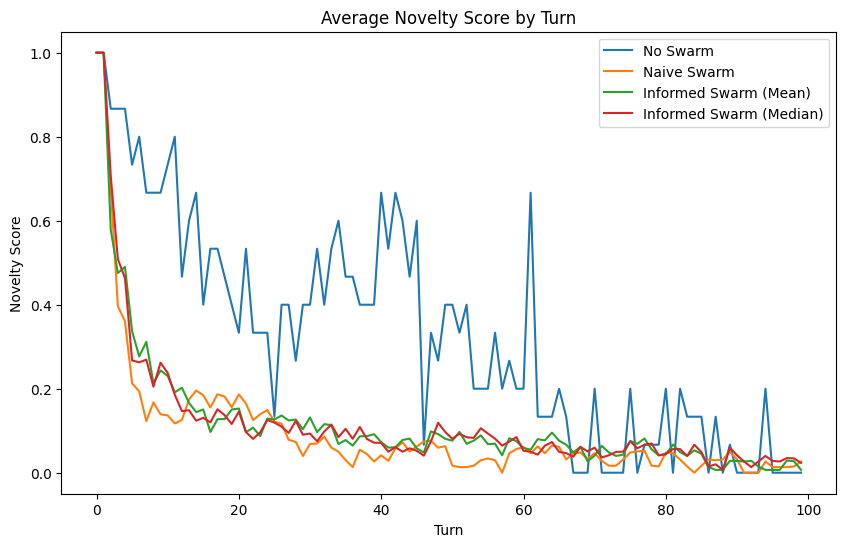

In [51]:
# Plot the avg results for each swarm type as a function of turns
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the average novelty score for each turn
ax.plot(experiment2_results.index, experiment2_results['no-swarm-avg'], label="No Swarm")
ax.plot(experiment2_results.index, experiment2_results['naive-avg'], label="Naive Swarm")
ax.plot(experiment2_results.index, experiment2_results['informed-mean-avg'], label="Informed Swarm (Mean)")
ax.plot(experiment2_results.index, experiment2_results['informed-median-avg'], label="Informed Swarm (Median)")

# Set the title and labels
ax.set_title("Average Novelty Score by Turn")
ax.set_xlabel("Turn")
ax.set_ylabel("Novelty Score")

# Set the legend
ax.legend()

# Show the plot
plt.show()